In [1]:
import time
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from pathlib import Path

In [2]:
MODEL_DIR = "./models/"
TEST_DIR = "./data/test/"
IMAGE_HEIGHT = IMAGE_WIDTH = 128

In [3]:
model_to_load = "cnn_rgb_augment_sgd.h5"
color_mode = "rgb"                  # "rgb", "rgba" or "grayscale"

In [4]:
model = keras.models.load_model(MODEL_DIR + model_to_load)

In [5]:
test_df = pd.read_csv("./data/test.csv")
test_df = test_df.set_index("filename")
test_df.head()

,category
filename,
fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,43
c7fd77508a8c355eaab0d4e10efd6b15.jpg,43
127f3e6d6e3491b2459812353f33a913.jpg,43
5ca4f2da11eda083064e6c36f37eeb81.jpg,43
46d681a542f2c71be017eef6aae23313.jpg,43


In [6]:
filenames = test_df.index.tolist()
filenames

['fd663cf2b6e1d7b02938c6aaae0a32d2.jpg',
 'c7fd77508a8c355eaab0d4e10efd6b15.jpg',
 '127f3e6d6e3491b2459812353f33a913.jpg',
 '5ca4f2da11eda083064e6c36f37eeb81.jpg',
 '46d681a542f2c71be017eef6aae23313.jpg',
 'f27ffaf1ab259a0efe2c59611de6732b.jpg',
 '5eb8d9688d86ec7277f10fc18f386913.jpg',
 '2ff578b587ec0c086ded573a3a9a9e3a.jpg',
 '936b60783f4f3d3f2b718cc28a1cd629.jpg',
 '2ac0233cc59040fd847f0cd9528772cc.jpg',
 'd48b0ac145ec13a81669def33f258061.jpg',
 '1f03c37a55fff626aaf1406667d7911d.jpg',
 '17bedab0c56ada8c0f7ea95245c298c1.jpg',
 '166c016926a72117761e704b563572c8.jpg',
 'f1ec208cd5fa338c91dcf464cd9105ae.jpg',
 'a773cea13ac11199c01fb675269bc757.jpg',
 'f10ba2bc802dea0cee8ddb23dca34eda.jpg',
 'a74dbd301050df8f4aa4eb65e0082ecf.jpg',
 'fb3bde81ad4679cb6c42f186952ea503.jpg',
 'eb1f0c90a1d11b5f0eb19e9f9f64120c.jpg',
 '8149a8a19f2fed05ce3ac20e5b7cbab0.jpg',
 'b1d52080b31a4bb53c57dbd2f589e7b6.jpg',
 '5baf51b680a34e7d196aa808157c9821.jpg',
 'fa3ded58d228a858cd7d683612a3edbc.jpg',
 'e7df1bff8ac065

In [7]:
start_time = time.time()
filepaths = [Path(TEST_DIR) / fn for fn in filenames]

for index, path in enumerate(filepaths):
    img = load_img(path, color_mode = color_mode, target_size = (IMAGE_HEIGHT, IMAGE_WIDTH))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    predicted_category = np.argmax(model.predict(img))
    test_df.loc[path.name]["category"] = predicted_category
    
    elapsed_time = time.time() - start_time
    avg_time = elapsed_time / (index + 1)
    print("Completed: {}/{} in {:.2f}s. Avg Time: {:.4f}s".format(index + 1, len(filepaths), elapsed_time, avg_time), end = "\r")

In [8]:
test_df.head()

,category
filename,
fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,15
c7fd77508a8c355eaab0d4e10efd6b15.jpg,15
127f3e6d6e3491b2459812353f33a913.jpg,18
5ca4f2da11eda083064e6c36f37eeb81.jpg,20
46d681a542f2c71be017eef6aae23313.jpg,26


In [9]:
test_df.shape

(12186, 1)

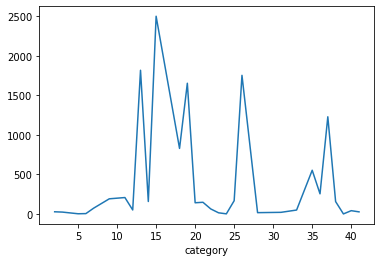

In [16]:
test_df.groupby("category").apply(lambda x: len(x)).plot()

In [12]:
test_df.to_csv("./data/predictions.csv")